# DSE 3260
## Week - 1
### Reg. No - 200968216
#### Pratinav Seth 

1.Use the Fashion MNIST data set and train a basic autoencoder to reconstruct images.

In [1]:
!git clone https://github.com/insop/Fashion-MNIST-csv.git

Cloning into 'Fashion-MNIST-csv'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 14 (delta 3), reused 10 (delta 2), pack-reused 0
Unpacking objects: 100% (14/14), 37.80 MiB | 7.50 MiB/s, done.


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import json, codecs
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os

Train the  model  using  x_train as both the  input and the  target.  

In [3]:
X_train = pd.read_csv("/content/Fashion-MNIST-csv/images_train.csv.gz",compression='gzip',header=None).values
X_test = pd.read_csv("/content/Fashion-MNIST-csv/images_test.csv.gz",compression='gzip',header=None).values


Y_train = pd.read_csv("/content/Fashion-MNIST-csv/labels_train.csv.gz",compression='gzip',header=None).values
Y_test = pd.read_csv("/content/Fashion-MNIST-csv/labels_test.csv.gz",compression='gzip',header=None).values

In [4]:
print("X_train shape --> ",X_train.shape)
print("Y_train shape --> ",Y_train.shape)
print("X_test shape --> ",X_test.shape)
print("Y_test shape --> ",Y_test.shape)

X_train shape -->  (60000, 784)
Y_train shape -->  (60000, 1)
X_test shape -->  (10000, 784)
Y_test shape -->  (10000, 1)


In [5]:
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [6]:
X_train[1].shape

(784,)

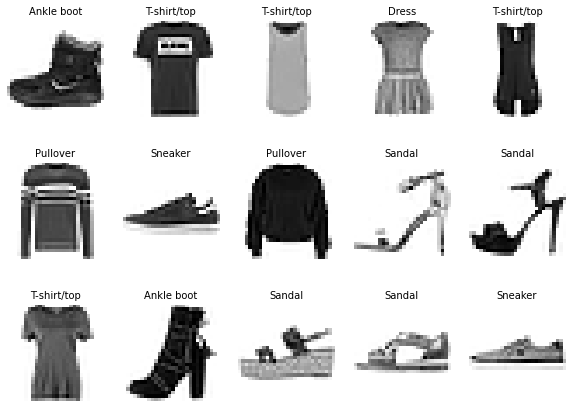

In [7]:
plt.figure(figsize=(10,10))

for i in range(15):
    plt.subplot(4,5,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap="gist_yarg")
    plt.title("T-shirt/top" if Y_train[i] == 0 
              else "Trouser" if Y_train[i] == 1
              else "Pullover" if Y_train[i] == 2
              else "Dress" if Y_train[i] == 3
              else "Coat" if Y_train[i] == 4
              else "Sandal" if Y_train[i] == 5
              else "Shirt" if Y_train[i] == 6
              else "Sneaker" if Y_train[i] == 7
              else "Bag" if Y_train[i] == 8
              else "Ankle boot", size = 10)
    plt.axis("off")
    
plt.show()


In [8]:
from keras.models import Model
from keras.layers import Input, Dense

The  encoder shouldlearn  to  compress  the  dataset  from  784  dimensions  to  the  latent  space,  and  the decoder should learn to reconstruct the original images.

Let the autoencoder have two Dense layers: 

a. an encoder, which compresses the images into a 64 dimensional latent vector, use reLU as activation function.

b.and a decoder, that reconstructs the original image from the latent space, use sigmoid as activation function.

In [9]:
input_img = Input(shape = (784,))

In [10]:
encoded = Dense(64, activation="relu")(input_img)
decoded = Dense(784, activation="sigmoid")(encoded)

In [11]:
autoencoder = Model(input_img, decoded)

Once the model is trained for at least 10 epochs , with loss function as mean square error, test it by encoding and decoding images from the test set. Display original and reconstructed images.

In [12]:
autoencoder.compile(optimizer="rmsprop", loss="mean_squared_error")

In [13]:
hist = autoencoder.fit(X_train, 
                       X_train,
                       epochs=10, 
                       batch_size=256, 
                       shuffle=True,
                       validation_data=(X_train, X_train))

Epoch 1/10
235/235 [==============================] - 7s 9ms/step - loss: 0.0882 - val_loss: 0.0606
Epoch 2/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0542 - val_loss: 0.0493
Epoch 3/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0456 - val_loss: 0.0423
Epoch 4/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0397 - val_loss: 0.0373
Epoch 5/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0352 - val_loss: 0.0333
Epoch 6/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0318 - val_loss: 0.0303
Epoch 7/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0291 - val_loss: 0.0280
Epoch 8/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0271 - val_loss: 0.0263
Epoch 9/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0255 - val_loss: 0.0248
Epoch 10/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0242 - val_loss: 0.0238

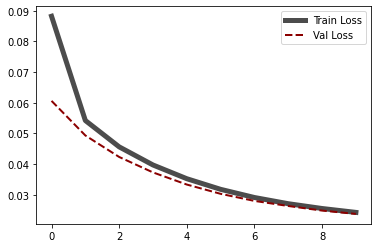

In [14]:
plt.plot(hist.history["loss"], label = "Train Loss", color = "black", alpha=0.7, linewidth=5)
plt.plot(hist.history["val_loss"], label = "Val Loss", color = "darkred", linewidth=2, linestyle='dashed')

plt.legend()
plt.show()

In [15]:
encoder = Model(input_img, encoded)
encoded_img = encoder.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [16]:
decoded_imgs = autoencoder.predict(X_test) 

313/313 [==============================] - 1s 2ms/step


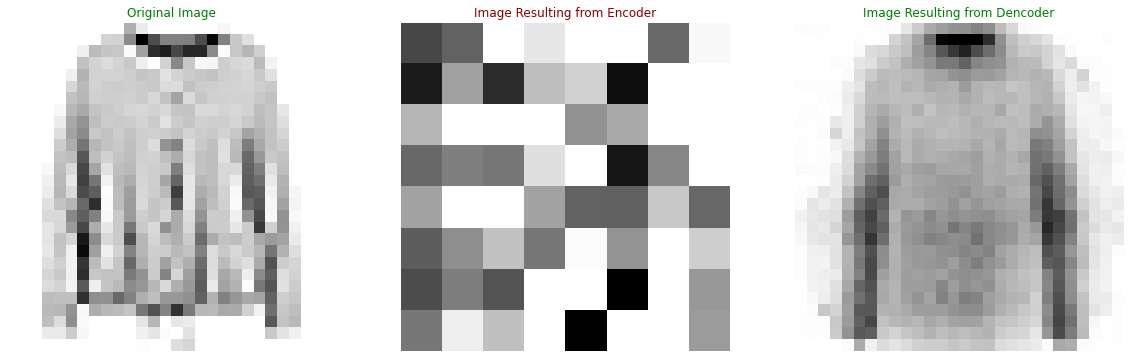

In [17]:
plt.figure(figsize=(20, 25))
plt.subplot(3, 3, 1)
plt.imshow(X_test[25].reshape(28,28), cmap="gist_yarg")
plt.title("Original Image", color = "green")
plt.axis("off")

plt.subplot(3, 3, 2)
plt.imshow(encoded_img[25].reshape(8,8), cmap="gist_yarg")
plt.title("Image Resulting from Encoder", color = "Darkred")
plt.axis("off")

plt.subplot(3, 3, 3)
plt.imshow(decoded_imgs[25].reshape(28,28), cmap="gist_yarg")
plt.title("Image Resulting from Dencoder", color = "green")
plt.axis("off")
plt.show()

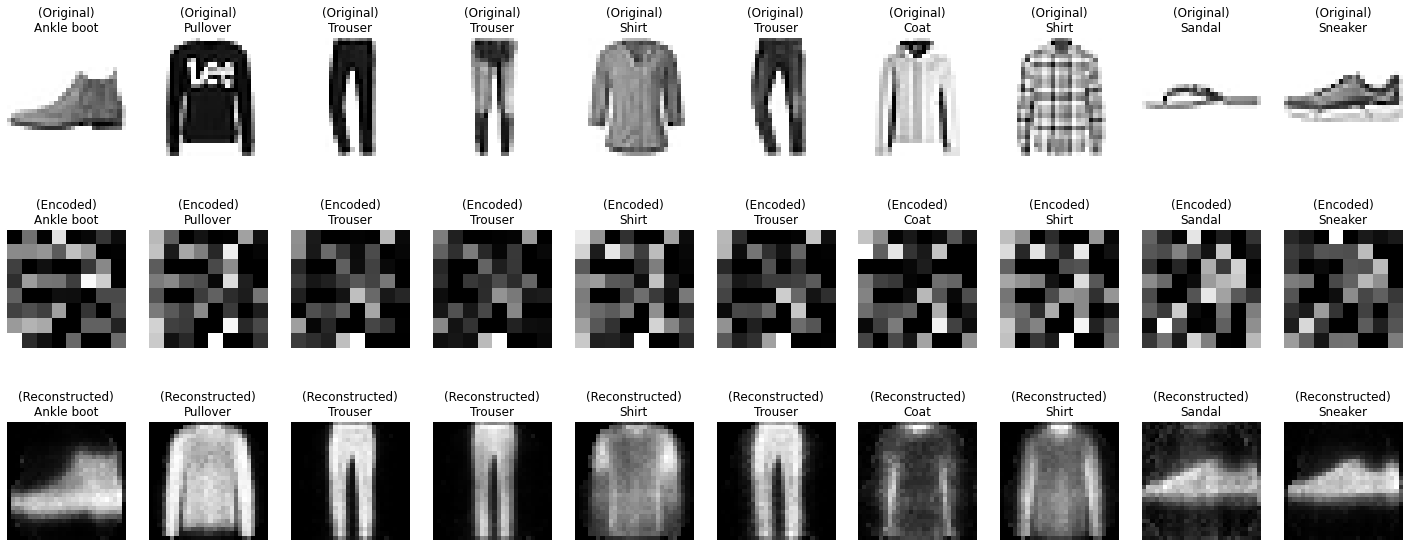

In [18]:
plt.figure(figsize=(25, 10))
for i in range(10):
    
    plt.subplot(3, 10, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gist_yarg")
    plt.title("(Original)\nT-shirt/top" if Y_test[i] == 0 
              else "(Original)\nTrouser" if Y_test[i] == 1
              else "(Original)\nPullover" if Y_test[i] == 2
              else "(Original)\nDress" if Y_test[i] == 3
              else "(Original)\nCoat" if Y_test[i] == 4
              else "(Original)\nSandal" if Y_test[i] == 5
              else "(Original)\nShirt" if Y_test[i] == 6
              else "(Original)\nSneaker" if Y_test[i] == 7
              else "(Original)\nBag" if Y_test[i] == 8
              else "(Original)\nAnkle boot")
    plt.axis("off")

    plt.subplot(3, 10, i + 1 + 10)
    plt.imshow(encoded_img[i].reshape(8, 8))
    plt.gray()
    plt.title("(Encoded)\nT-shirt/top" if Y_test[i] == 0 
              else "(Encoded)\nTrouser" if Y_test[i] == 1
              else "(Encoded)\nPullover" if Y_test[i] == 2
              else "(Encoded)\nDress" if Y_test[i] == 3
              else "(Encoded)\nCoat" if Y_test[i] == 4
              else "(Encoded)\nSandal" if Y_test[i] == 5
              else "(Encoded)\nShirt" if Y_test[i] == 6
              else "(Encoded)\nSneaker" if Y_test[i] == 7
              else "(Encoded)\nBag" if Y_test[i] == 8
              else "(Encoded)\nAnkle boot")
    plt.axis("off")

    plt.subplot(3, 10, i + 1 + 20)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    plt.title("(Reconstructed)\nT-shirt/top" if Y_test[i] == 0 
              else "(Reconstructed)\nTrouser" if Y_test[i] == 1
              else "(Reconstructed)\nPullover" if Y_test[i] == 2
              else "(Reconstructed)\nDress" if Y_test[i] == 3
              else "(Reconstructed)\nCoat" if Y_test[i] == 4
              else "(Reconstructed)\nSandal" if Y_test[i] == 5
              else "(Reconstructed)\nShirt" if Y_test[i] == 6
              else "(Reconstructed)\nSneaker" if Y_test[i] == 7
              else "(Reconstructed)\nBag" if Y_test[i] == 8
              else "(Reconstructed)\nAnkle boot")
    plt.axis("off")

plt.show()